In [2]:
pip install pyspark

In [3]:
from pyspark.sql import SparkSession
spark = (SparkSession.builder.appName("PySpark_Tutorial").getOrCreate())

In [4]:
spark

In [5]:
data = spark.read.csv("/content/job.csv", header=True, inferSchema=True)
print("Readin the ")
data.show()

Readin the 
+---------+---------+---------+--------------------+--------------------+--------------------+--------------+--------------------+--------------------+-------------------+--------------------+
|StudentID|FirstName| LastName|           Institute|               Major|                 GPA|GraduationYear|              Skills|InternshipExperience|  ApplicationStatus|       PreferredRole|
+---------+---------+---------+--------------------+--------------------+--------------------+--------------+--------------------+--------------------+-------------------+--------------------+
|        1|    Aarav|   Sharma|Indian Institute ...|    Computer Science|                 8.9|        2024.0|Python, Java, Dat...|                 Yes|          Submitted|   Software Engineer|
|        2|     Riya|    Singh|National Institut...|Electronics and C...|                 8.5|        2025.0|C++, Embedded Sys...|                 Yes|          In Review|Embedded Systems ...|
|        3|   Aditya|  

In [6]:
from pyspark.sql.functions import *
mode_data = data.select(mode("GPA")).collect()[0][0]
data = data.fillna({"GPA" : mode_data})
print("Filling null values of GPA")
data.show()


Filling null values of GPA
+---------+---------+---------+--------------------+--------------------+--------------------+--------------+--------------------+--------------------+-------------------+--------------------+
|StudentID|FirstName| LastName|           Institute|               Major|                 GPA|GraduationYear|              Skills|InternshipExperience|  ApplicationStatus|       PreferredRole|
+---------+---------+---------+--------------------+--------------------+--------------------+--------------+--------------------+--------------------+-------------------+--------------------+
|        1|    Aarav|   Sharma|Indian Institute ...|    Computer Science|                 8.9|        2024.0|Python, Java, Dat...|                 Yes|          Submitted|   Software Engineer|
|        2|     Riya|    Singh|National Institut...|Electronics and C...|                 8.5|        2025.0|C++, Embedded Sys...|                 Yes|          In Review|Embedded Systems ...|
|       

In [7]:
ie_data = data.fillna({"InternshipExperience" : 0})
print("Filling null values of InternshipExperience")
ie_data.show()

Filling null values of InternshipExperience
+---------+---------+---------+--------------------+--------------------+--------------------+--------------+--------------------+--------------------+-------------------+--------------------+
|StudentID|FirstName| LastName|           Institute|               Major|                 GPA|GraduationYear|              Skills|InternshipExperience|  ApplicationStatus|       PreferredRole|
+---------+---------+---------+--------------------+--------------------+--------------------+--------------+--------------------+--------------------+-------------------+--------------------+
|        1|    Aarav|   Sharma|Indian Institute ...|    Computer Science|                 8.9|        2024.0|Python, Java, Dat...|                 Yes|          Submitted|   Software Engineer|
|        2|     Riya|    Singh|National Institut...|Electronics and C...|                 8.5|        2025.0|C++, Embedded Sys...|                 Yes|          In Review|Embedded Syst

In [8]:
from pyspark.sql.functions import col, isnull
from pyspark.sql.types import *

# Define the expected schema
expected_schema = StructType([
    StructField("StudentID", IntegerType(), True),
    StructField("FirstName", StringType(), True),
    StructField("LastName", StringType(), True),
    StructField("Institute", StringType(), True),
    StructField("Major", StringType(), True),
    StructField("GPA", DoubleType(), True),
    StructField("GraduationYear", IntegerType(), True),
    StructField("Skills", StringType(), True),
    StructField("InternshipExperience", StringType(), True),
    StructField("ApplicationStatus", StringType(), True),
    StructField("PreferredRole", StringType(), True)
])


cleaned_data = data.withColumn("GPA_casted", col("GPA").cast(DoubleType()))\
                   .withColumn("GraduationYear_casted", col("GraduationYear").cast(IntegerType()))

filtered_data = cleaned_data.filter(col("GPA_casted").isNotNull() & col("GraduationYear_casted").isNotNull())

cleaned_data = filtered_data.select([col(field.name) for field in expected_schema.fields])


cleaned_data.show()

+---------+---------+---------+--------------------+--------------------+---+--------------+--------------------+--------------------+-------------------+--------------------+
|StudentID|FirstName| LastName|           Institute|               Major|GPA|GraduationYear|              Skills|InternshipExperience|  ApplicationStatus|       PreferredRole|
+---------+---------+---------+--------------------+--------------------+---+--------------+--------------------+--------------------+-------------------+--------------------+
|        1|    Aarav|   Sharma|Indian Institute ...|    Computer Science|8.9|        2024.0|Python, Java, Dat...|                 Yes|          Submitted|   Software Engineer|
|        2|     Riya|    Singh|National Institut...|Electronics and C...|8.5|        2025.0|C++, Embedded Sys...|                 Yes|          In Review|Embedded Systems ...|
|        3|   Aditya|   Mishra|Indian Institute ...|Mechanical Engine...|7.8|        2024.0|CAD, SolidWorks, ...|       

In [9]:
iit_data = cleaned_data.filter(cleaned_data.Institute.startswith("Indian"))
iit_data.show()

+---------+---------+---------+--------------------+--------------------+---+--------------+--------------------+--------------------+-------------------+--------------------+
|StudentID|FirstName| LastName|           Institute|               Major|GPA|GraduationYear|              Skills|InternshipExperience|  ApplicationStatus|       PreferredRole|
+---------+---------+---------+--------------------+--------------------+---+--------------+--------------------+--------------------+-------------------+--------------------+
|        1|    Aarav|   Sharma|Indian Institute ...|    Computer Science|8.9|        2024.0|Python, Java, Dat...|                 Yes|          Submitted|   Software Engineer|
|        3|   Aditya|   Mishra|Indian Institute ...|Mechanical Engine...|7.8|        2024.0|CAD, SolidWorks, ...|                  No|          Submitted| Mechanical Engineer|
|        4|   Ishita|     Jain|Indian Institute ...|    Computer Science|9.2|        2024.0|Machine Learning,...|       

In [10]:
gpa_data = iit_data.filter(iit_data.GPA >= 8.5)
gpa_data.show()
major_counts = gpa_data.groupBy("Major").count().withColumnRenamed("count", "Major_Count")
major_counts.show()

+---------+---------+---------+--------------------+--------------------+---+--------------+--------------------+--------------------+-------------------+--------------------+
|StudentID|FirstName| LastName|           Institute|               Major|GPA|GraduationYear|              Skills|InternshipExperience|  ApplicationStatus|       PreferredRole|
+---------+---------+---------+--------------------+--------------------+---+--------------+--------------------+--------------------+-------------------+--------------------+
|        1|    Aarav|   Sharma|Indian Institute ...|    Computer Science|8.9|        2024.0|Python, Java, Dat...|                 Yes|          Submitted|   Software Engineer|
|        4|   Ishita|     Jain|Indian Institute ...|    Computer Science|9.2|        2024.0|Machine Learning,...|                 Yes|          In Review|      Data Scientist|
|       18|    Ankit|      Das|Indian Institute ...|    Computer Science|9.1|        2024.0|DevOps, AWS, Dock...|       

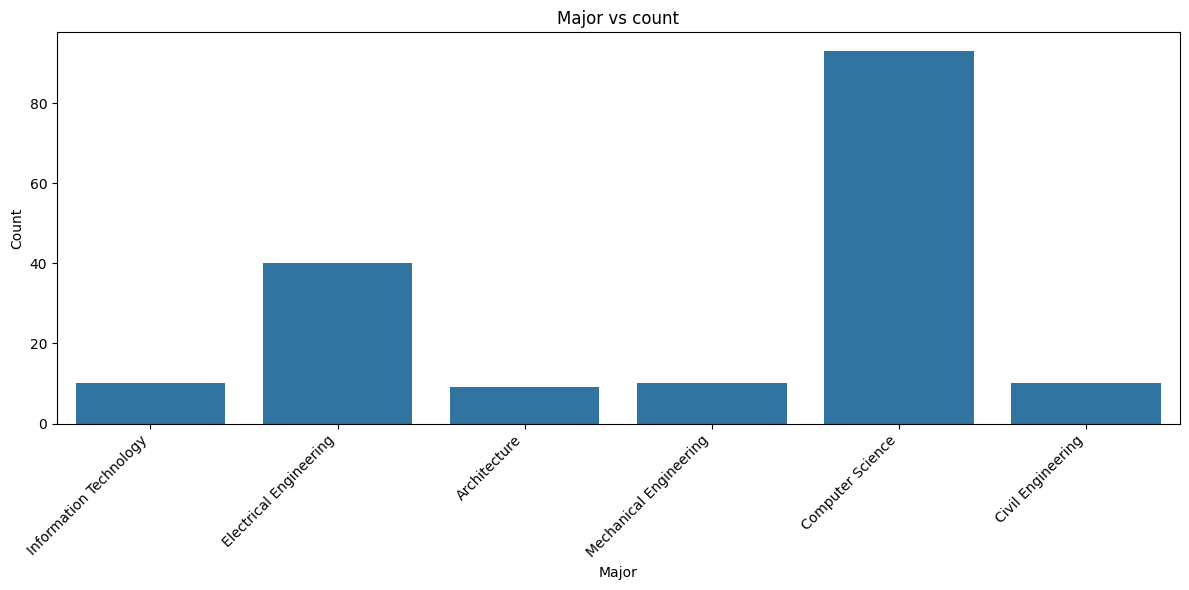

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

iit_data_pd = major_counts.select("Major", "Major_Count").toPandas()
plt.figure(figsize=(12, 6))
sns.barplot(data=iit_data_pd, x='Major', y='Major_Count')
plt.title('Major vs count')
plt.xlabel('Major')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Task
Apply logistic regression to the "gpa_data" dataset. Filter the data based on the following criteria: 'Institute' is one of 'IIT', 'NIT', or 'VIT'; 'GPA' is greater than or equal to 8.5; 'InternshipExperience' is 'yes'; and 'Application Status' is 'submitted' or 'Interview Scheduled'. Train a logistic regression model on the filtered data to predict eligibility. Add an input box for the user to enter a student ID. Use the trained model to predict eligibility for the student with the given ID. If the student is predicted as eligible, print "He/She is eligible", otherwise print "Not eligible".

## Data loading and initial cleaning

### Subtask:
Load the data and perform initial cleaning steps like handling missing values.


**Reasoning**:
Load the data and perform initial cleaning steps as per the instructions to prepare the data for further processing.



In [29]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import mode, col, isnull
from pyspark.sql.types import *

spark = (SparkSession.builder.appName("PySpark_Tutorial").getOrCreate())
data = spark.read.csv("/content/job.csv", header=True, inferSchema=True)
print("Reading the data:")
data.show()

# Fill null values in "GPA"
mode_data = data.select(mode("GPA")).collect()[0][0]
data = data.fillna({"GPA" : mode_data})
print("Filling null values of GPA")
data.show()

# Fill null values in "InternshipExperience"
data = data.fillna({"InternshipExperience" : "No"})
print("Filling null values of InternshipExperience")
data.show()

# Define the expected schema
expected_schema = StructType([
    StructField("StudentID", IntegerType(), True),
    StructField("FirstName", StringType(), True),
    StructField("LastName", StringType(), True),
    StructField("Institute", StringType(), True),
    StructField("Major", StringType(), True),
    StructField("GPA", DoubleType(), True),
    StructField("GraduationYear", IntegerType(), True),
    StructField("Skills", StringType(), True),
    StructField("InternshipExperience", StringType(), True),
    StructField("ApplicationStatus", StringType(), True),
    StructField("PreferredRole", StringType(), True)
])

# Cast 'GPA' and 'GraduationYear' and filter out nulls
cleaned_data = data.withColumn("GPA_casted", col("GPA").cast(DoubleType()))\
                   .withColumn("GraduationYear_casted", col("GraduationYear").cast(IntegerType()))

filtered_data = cleaned_data.filter(col("GPA_casted").isNotNull() & col("GraduationYear_casted").isNotNull())

# Select the original columns to match the expected schema
cleaned_data = filtered_data.select([col(field.name) for field in expected_schema.fields])

print("Cleaned data:")
cleaned_data.show()

Reading the data:
+---------+---------+---------+--------------------+--------------------+--------------------+--------------+--------------------+--------------------+-------------------+--------------------+
|StudentID|FirstName| LastName|           Institute|               Major|                 GPA|GraduationYear|              Skills|InternshipExperience|  ApplicationStatus|       PreferredRole|
+---------+---------+---------+--------------------+--------------------+--------------------+--------------+--------------------+--------------------+-------------------+--------------------+
|        1|    Aarav|   Sharma|Indian Institute ...|    Computer Science|                 8.9|        2024.0|Python, Java, Dat...|                 Yes|          Submitted|   Software Engineer|
|        2|     Riya|    Singh|National Institut...|Electronics and C...|                 8.5|        2025.0|C++, Embedded Sys...|                 Yes|          In Review|Embedded Systems ...|
|        3|   Adi

## Data preparation for logistic regression

### Subtask:
Filter the data based on the specified criteria (Institute, GPA, InternshipExperience, ApplicationStatus). Select features (Institute, Major, GPA, InternshipExperience, ApplicationStatus) and the target variable (Eligibility). Convert categorical features to numerical using one-hot encoding.


**Reasoning**:
Filter the data based on the specified criteria, select features, create the target variable, and apply one-hot encoding using PySpark MLlib to prepare the data for model training.



In [30]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import col, when

# 1. Filter the data based on the specified criteria
filtered_eligibility_data = cleaned_data.filter(
    (col("Institute").startswith("Indian Institute of Technology") |
     col("Institute").startswith("National Institute of Technology") |
     col("Institute").startswith("Vellore Institute of Technology")) &
    (col("GPA") >= 8.5) &
    (col("InternshipExperience") == "Yes") &
    ((col("ApplicationStatus") == "Submitted") | (col("ApplicationStatus") == "Interview Scheduled"))
)

# 2. Select features and 3. Create the target variable
eligibility_data = filtered_eligibility_data.select(
    "Institute",
    "Major",
    col("GPA").cast("double").alias("GPA_double"), # Cast GPA to double
    "InternshipExperience",
    "ApplicationStatus",
    when(col("ApplicationStatus") == "Interview Scheduled", 1).otherwise(0).alias("Eligibility")
)

# 4. Apply one-hot encoding
categorical_cols = ["Institute", "Major", "InternshipExperience", "ApplicationStatus"]
indexers = [StringIndexer(inputCol=col, outputCol=col + "_indexed", handleInvalid="keep") for col in categorical_cols]
encoders = [OneHotEncoder(inputCol=col + "_indexed", outputCol=col + "_encoded") for col in categorical_cols]

# 5. Assemble the encoded features
assembler_inputs = [col + "_encoded" for col in categorical_cols] + ["GPA_double"] # Use the casted GPA column
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features", handleInvalid="keep")

# 8. Create a PySpark Pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler])

# 9. Fit the pipeline and transform the data
pipeline_model = pipeline.fit(eligibility_data) # Fit the pipeline to the data
encoded_data = pipeline_model.transform(eligibility_data)

# 10. Display the first few rows of the encoded_data DataFrame
encoded_data.show()

+--------------------+--------------------+----------+--------------------+-------------------+-----------+-----------------+-------------+----------------------------+-------------------------+-----------------+-------------+----------------------------+-------------------------+--------------------+
|           Institute|               Major|GPA_double|InternshipExperience|  ApplicationStatus|Eligibility|Institute_indexed|Major_indexed|InternshipExperience_indexed|ApplicationStatus_indexed|Institute_encoded|Major_encoded|InternshipExperience_encoded|ApplicationStatus_encoded|            features|
+--------------------+--------------------+----------+--------------------+-------------------+-----------+-----------------+-------------+----------------------------+-------------------------+-----------------+-------------+----------------------------+-------------------------+--------------------+
|Indian Institute ...|    Computer Science|       8.9|                 Yes|          Submit

## Model training

### Subtask:
Train a logistic regression model on the prepared data.


**Reasoning**:
Train a logistic regression model using the prepared data.



In [31]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol='features', labelCol='Eligibility')
lr_model = lr.fit(encoded_data)

## Prediction function

### Subtask:
Create a function that takes a student ID as input, retrieves the student's data, applies the same data preparation steps, and uses the trained model to predict eligibility.


**Reasoning**:
Define the predict_eligibility function as requested, incorporating the specified steps for filtering, selecting features, casting GPA, transforming data using the pipeline model, and making a prediction with the logistic regression model.



In [32]:
from pyspark.sql.functions import col, when

def predict_eligibility(student_id, cleaned_data, pipeline_model, lr_model):
    """
    Predicts the job eligibility for a given student ID.

    Args:
        student_id (int): The ID of the student.
        cleaned_data (DataFrame): The preprocessed DataFrame containing student data.
        pipeline_model (PipelineModel): The fitted pipeline model for data transformation.
        lr_model (LogisticRegressionModel): The trained logistic regression model.

    Returns:
        str: The prediction result or a message if the student is not found.
    """
    student_data = cleaned_data.filter(col("StudentID") == student_id)

    if student_data.count() == 0:
        return f"Student with ID {student_id} not found."
    else:
        # Apply the same data preparation steps
        student_data_prepared = student_data.select(
            "Institute",
            "Major",
            col("GPA").cast("double").alias("GPA_double"), # Cast GPA to double
            "InternshipExperience",
            "ApplicationStatus"
        )

        # Transform the student data using the fitted pipeline
        transformed_student_data = pipeline_model.transform(student_data_prepared)

        # Make a prediction using the trained model
        prediction = lr_model.transform(transformed_student_data)

        # Get the predicted label
        predicted_label = prediction.select("prediction").collect()[0][0]

        if predicted_label == 1.0:
            return f"Student with ID {student_id} is predicted to be eligible."
        else:
            return f"Student with ID {student_id} is predicted to be not eligible."

## User input and prediction

### Subtask:
Add an input box for the user to enter a student ID. Call the prediction function with the entered ID and display the prediction result.


**Reasoning**:
Create an integer text box for student ID input and define a function to handle the input and display the prediction.



In [47]:
import ipywidgets as widgets
from IPython.display import display

student_id_input = widgets.IntText(
    description='Enter Student ID:',
    disabled=False
)

def on_student_id_change(change):
    student_id = change['new']
    if student_id is not None:
        prediction_result = predict_eligibility(student_id, cleaned_data, pipeline_model, lr_model)
        print(prediction_result)

display(student_id_input)
student_id_input.observe(on_student_id_change, names='value')

Student with ID 8 is predicted to be not eligible.


IntText(value=0, description='Enter Student ID:')

## User input and prediction

### Subtask:
Add an input box for the user to enter a student ID. Call the prediction function with the entered ID and display the prediction result.

**Reasoning**:
Create an integer text box for student ID input and define a function to handle the input and display the prediction.

## Model Evaluation

### Subtask:
Evaluate the performance of the trained logistic regression model using accuracy, F1 score, precision, and recall.

**Reasoning**:
Use the trained logistic regression model to make predictions on the training data and then calculate the accuracy, F1 score, precision, and recall using PySpark MLlib's BinaryClassificationEvaluator.

In [44]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.sql.functions import col

# Make predictions on the training data
predictions = lr_model.transform(encoded_data)

# Evaluate the model for Area Under ROC
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="Eligibility", metricName="areaUnderROC")
auc = evaluator.evaluate(predictions)
print(f"Area Under ROC: {auc}")

# Calculate Accuracy at threshold 0.5
accuracy = predictions.filter(predictions.Eligibility == predictions.prediction).count() / predictions.count()
print(f"Accuracy at threshold 0.5: {accuracy}")

# Calculate Precision, Recall, and F1 Score at threshold 0.5
# We need to calculate True Positives, False Positives, and False Negatives at the threshold
# For binary classification with a threshold of 0.5, the prediction column already represents the predicted class (0 or 1)

true_positives = predictions.filter((col("Eligibility") == 1.0) & (col("prediction") == 1.0)).count()
false_positives = predictions.filter((col("Eligibility") == 0.0) & (col("prediction") == 1.0)).count()
false_negatives = predictions.filter((col("Eligibility") == 1.0) & (col("prediction") == 0.0)).count()

# Calculate Precision
precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0.0
print(f"Precision at threshold 0.5: {precision}")

# Calculate Recall
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0.0
print(f"Recall at threshold 0.5: {recall}")

# Calculate F1 Score
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0
print(f"F1 Score at threshold 0.5: {f1_score}")

Area Under ROC: 1.0
Accuracy at threshold 0.5: 1.0
Precision at threshold 0.5: 1.0
Recall at threshold 0.5: 1.0
F1 Score at threshold 0.5: 1.0
